In [51]:
import os 
import sys
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches

from utils import plot_data
# reload notebook
%load_ext autoreload
%autoreload 2

In [98]:
path_prefix = '../tmp/data'
names = os.listdir(path_prefix)
data = {}
columns = ['timesteps', 'Eval avg final dist', 'Eval success ratio', 'policy loss']
for name in names:
    path = os.path.join(path_prefix,name)
    dfs = []
    for f in os.listdir(path):
        if f.endswith('.csv'):
            df = pd.read_csv(os.path.join(path, f))[columns]
            df['name'] = name 
            dfs.append(df)
    data[name] = pd.concat(dfs)
names

['fullTrajDec',
 'gcsl_org',
 'l',
 'l_ssl',
 'med',
 'medssl',
 'medsslvicreg',
 'medvicreg',
 'modu_concat',
 'modu_film',
 'modu_gate',
 'modu_gate_EXPL',
 'pre',
 's',
 'singleActDec',
 'singleActDecNoSSLNoVR',
 'singleActDecNoSSLVR',
 'singleActDecNoVR',
 's_ssl',
 's_ssl_vicreg']

In [99]:
base_frames = [df for name, df in data.items() if name in ['gcsl_org', 'singleActDec', 'singleActDecNoVR', 'singleActDecNoSSLNoVR', 'singleActDecNoSSLVR']]
base_med_frames = [df for name, df in data.items() if name in ['gcsl_org', 'med', 'medssl', 'medvicreg', 'medsslvicreg']]

base_frames_df = pd.concat(base_frames, ignore_index=True)
# traj_frames = [df for name, df in data.items() if name in ['gcsl_org', 'fullTrajDec', 'pre', 'modu_gate', 'modu_gate_EXPL','modu_film', 'modu_film']]
traj_frames = [df for name, df in data.items() if name in ['gcsl_org', 'pre', 'modu_gate', 'modu_gate_EXPL','modu_film', 'modu_concat']]
core_frames = [df for name, df in data.items() if name in ['gcsl_org', 's', 'l', 's_ssl', 'l_ssl', 's_ssl_vicreg']]
traj_frames_df = pd.concat(traj_frames)

In [100]:
name_mapping_goal= {
    'gcsl_org': 'GCSL',
    'modu_film': 'Transformer_Base_FiLM',
    'modu_gate_EXPL': 'Transformer_Base_Gate',
    'modu_concat': 'Transformer_Base_Concat',
    'pre': 'Transformer_Base'
}

# change name of list of dataframes 
for df in traj_frames:
    df['name'] = df['name'].map(name_mapping_goal)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


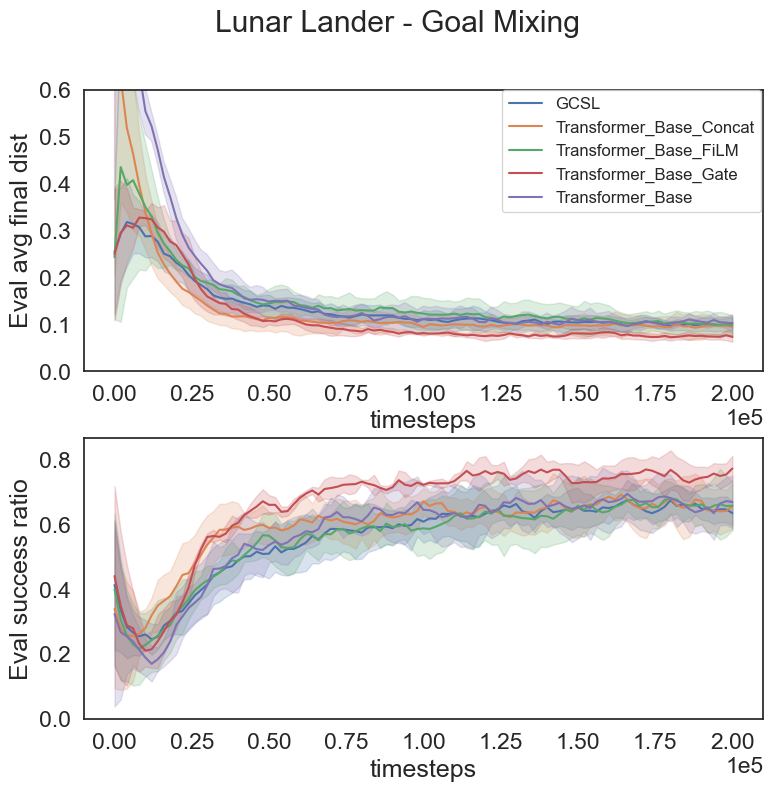

In [114]:
fig, axs = plt.subplots(2, 1, figsize=(8,8))
# ax = sns.lineplot(data=traj_frames_df, x='timesteps', y=columns[2], hue='name', errorbar='sd')
sns.set(font_scale=1)
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plot_data(traj_frames, xaxis='timesteps', value=columns[1], condition='name', alpha=.25, ax=axs[0], legend=False)
axs[0].set_ylim(0,0.6)
axs[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plot_data(traj_frames, xaxis='timesteps', value=columns[2], condition='name', alpha=.25, ax=axs[1])
handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
axs[1].get_legend().remove()
# plt.title("Sequence Input", fontsize=25)
sns.move_legend(fig, "upper left", bbox_to_anchor=(.62, .89), fontsize=12)
# sns.move_legend(
#     ax, "lower center",
#     bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
# )
fig.suptitle("Lunar Lander - Goal Mixing")
fig.subplots_adjust(top=0.88)

In [93]:
name_mapping_reg = {
    'gcsl_org': 'GCSL',
    'singleActDec': 'Transformer_S_Single_Dec_TGT_VR',
    'singleActDecNoVR': 'Transformer_S_Single_Dec_TGT',
    'singleActDecNoSSLNoVR': 'Transformer_S_Single_Dec',
    'singleActDecNoSSLVR': 'Transformer_S_Single_Dec_VR',
}

# change name of list of dataframes 
for df in base_frames:
    df['name'] = df['name'].map(name_mapping_reg)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


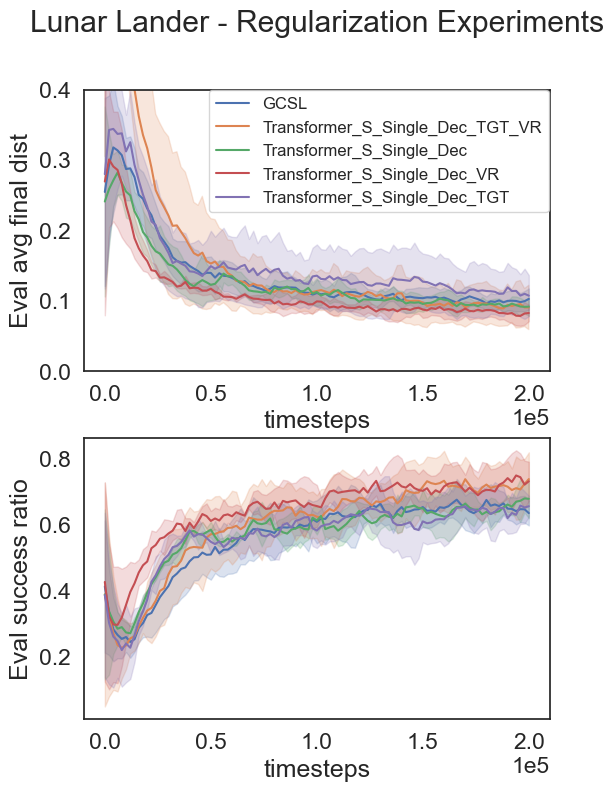

In [94]:
alpha = 0.25
fig, axs = plt.subplots(2, 1, figsize=(8,8))
sns.set(font_scale=1)
plot_data(base_frames, xaxis='timesteps', value=columns[1], condition='name', alpha=alpha, ax=axs[0], legend=False)
axs[0].set_ylim(0,0.4)
axs[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plot_data(base_frames, xaxis='timesteps', value=columns[2], condition='name', alpha=alpha, ax=axs[1])
handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
axs[1].get_legend().remove()
sns.move_legend(fig, "upper left", bbox_to_anchor=(.355, .89), fontsize=12)
fig.suptitle("Lunar Lander - Regularization Experiments")
fig.subplots_adjust(top=0.88)

# Experiments that show importance of goal mixing (3 runs), idm traj instead
- idm single act, with no goal mixing standard sizing | slurm: 28878, 28879, 28880 | slurm: 29006, 29007,  (traj)
- as above, but increase to 32_4l enc dec | slurm: 28885, 28886, 28887 | slurm: 29009, 29010, 29011 (traj)
- then after take best of these and add ssl, | slurmL: 29017, 29018, 29019 | slurmS: 29020, 29021, 29022 (forgot removing N from Nssl)
- as above but add vicreg too | slurmS: 

In [11]:
name_mapping_full_dec = {
    'gcsl_org': 'GCSL',
    's': 'Transformer_S_Full_Dec',
    'l': 'Transformer_L_Full_Dec',
    's_ssl': 'Transformer_S_Full_Dec_TGT',
    'l_ssl': 'Transformer_L_Full_Dec_TGT',
    's_ssl_vicreg': 'Transformer_S_Full_Dec_TGT_VICREG',
}

# change name of list of dataframes 
for df in core_frames:
    df['name'] = df['name'].map(name_mapping_full_dec)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


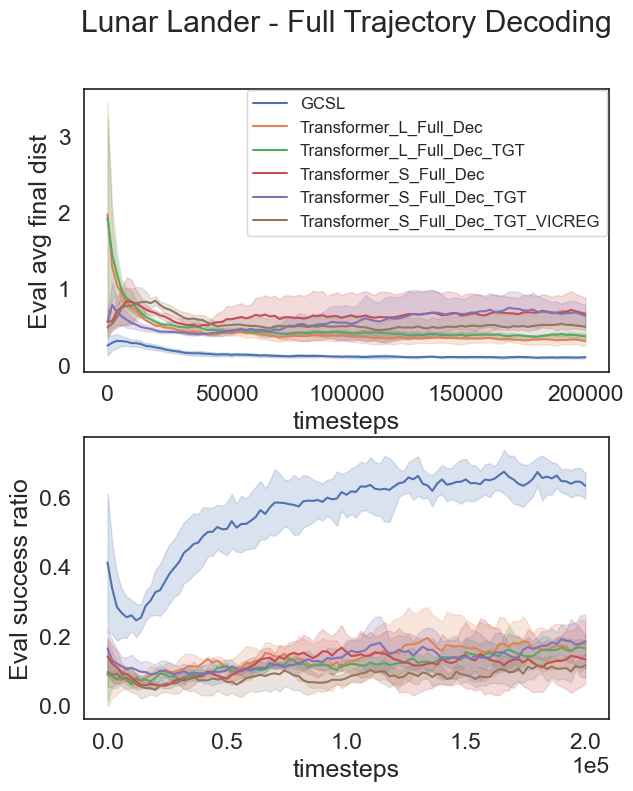

In [80]:
alpha = 0.25
fig, axs = plt.subplots(2,1, figsize=(8, 8))
sns.set(font_scale=1)
plot_data(core_frames, xaxis='timesteps', value=columns[1], condition='name', alpha=alpha, ax=axs[0],legend=False)
# axs[0].set_ylim(0,0.8)
# axs[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plot_data(core_frames, xaxis='timesteps', value=columns[2], condition='name', alpha=alpha, ax=axs[1])
handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
axs[1].get_legend().remove()
sns.move_legend(fig, "upper left", bbox_to_anchor=(.365, .89), fontsize=12)
# legend font size smaller 
fig.suptitle("Lunar Lander - Full Trajectory Decoding")
fig.subplots_adjust(top=0.88)
# s = 8_2l_32f, l = 32_4l_128f
# try run ssl+vicreg version, with and without expl

# Experiments to ablate vicreg and ssl + model size effect allow goal mixing
already done for the regularization experiments, simply do for larger model, and do one run for only vicreg
---- Try without the pre, but single state, just add ssl and vicreg to both medium and small nets, expect that small will match large
     once we add ssl+vicreg
 - allow goal mixing here, ablation over effect off ssl and vicreg instead
- med: 29099, 29100, 29101
- med ssl: 29102, 29103, 29104
- ssl + vicreg med: 29105, 29107, 29108
VICREGS
- vicreg med: 29167, 29170, 29171
- vicreg small: 29229, 29230, 29231

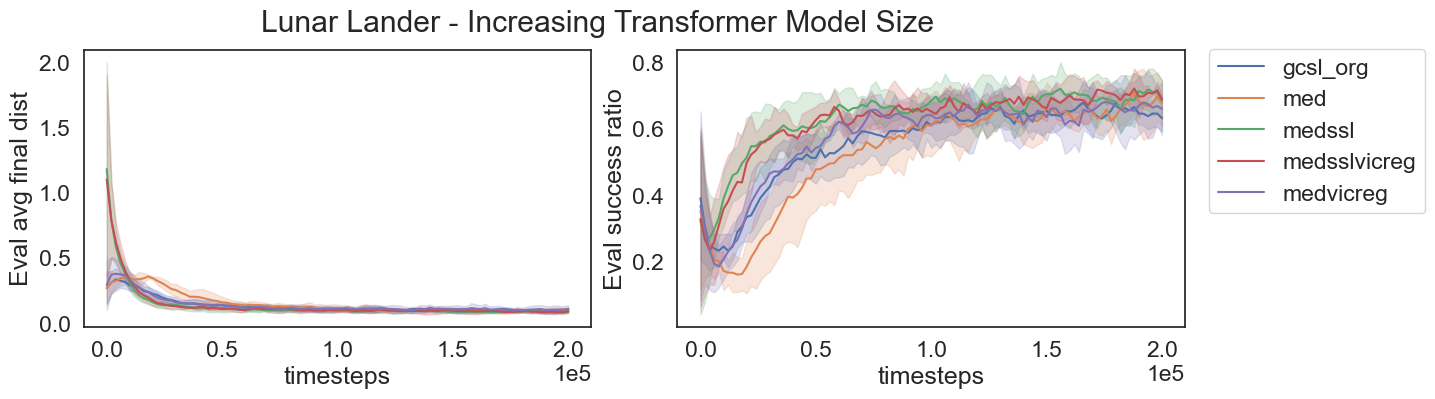

In [10]:
alpha = 0.3
fig, axs = plt.subplots(1, 2, figsize=(12,4))
sns.set(font_scale=1)
plot_data(base_med_frames, xaxis='timesteps', value=columns[1], condition='name', alpha=alpha, ax=axs[0], legend=False)
# axs[0].set_ylim(0,0.8)
axs[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plot_data(base_med_frames, xaxis='timesteps', value=columns[2], condition='name', alpha=alpha, ax=axs[1])
handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
axs[1].get_legend().remove()
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, .91))
fig.suptitle("Lunar Lander - Increasing Transformer Model Size")
fig.subplots_adjust(top=0.88)
# s = 8_2l_32f, l = 32_4l_128f

Writing outline
- Transformer is a sequential model, we feed sequential history of states and decode actions (Goal Mixing Experiments)
    - does not work well, as the goal is not well formulated
    - we try multiple forms of regularization ema, vicreg
- we introduce a clearer goal mixing, and suddenly it works (regularization experiments)
    - we find that it is slightly better than gcsl and that ema + vicreg is slightly better than not using it
- we explore ways for better goal mixing in the transformer, pre (default), FiLM and gating
    - we find that gating works best, and allowing sampling actions according to logits works well too

- add vicreg only experiments for small and med:

Next benchmark gating with expl on gcsl suite
